In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, accuracy_score, roc_curve


In [3]:
df = pd.read_csv('features_train.csv')
df.shape

(2400, 20)

In [4]:
cl = pd.read_csv('classes_train.csv')
cl.shape

(2400, 1)

In [5]:
cl1 = cl.copy()


In [6]:
# последним столбцом добавляем метки классов, удаляем бинарные признаки
df1 = df.copy()
df1['is_bot'] = pd.Series(cl['is_bot'], index = df1.index)

df1.head()

statuses_count  followers_count  friends_count  favourites_count  \
0            5124             6641           3074             13768   
1           10672             8465           1575              4561   
2             704             3108            454              2400   
3            6091           304528            526               599   
4           12967            13693            204              1177   

   listed_count  is_default_profile  is_profile_use_background_image  \
0           126                   0                                0   
1           191                   0                                1   
2            77                   0                                0   
3          1515                   0                                1   
4           452                   0                                1   

   is_verified  user_age  tweets_freq  ...  friends_growth_rate  \
0            1      2711     1.890077  ...             1.133899   
1            1      4424     2.412297  ...             0.356013   
2            0      1358     0.518409  ...             0.334315   
3            1      4214     1.445420  ...             0.124822   
4            1      3200     4.052187  ...             0.063750   

   favourites_growth_rate  listed_growth_rate  followers_friends_ratio  \
0                5.078569            0.046477                 2.160377   
1                1.030967            0.043174                 5.374603   
2                1.767305            0.056701                 6.845815   
3                0.142145            0.359516               578.950570   
4                0.367812            0.141250                67.122549   

   screen_name_length  num_digits_in_screen_name  length_of_name  \
0                  12                          0              14   
1                  11                          0              23   
2                  12                          0              18   
3                  10                          0              11   
4                  13                          0              14   

   num_digits_in_name  description_length  is_bot  
0                   0                  73       0  
1                   0                 142       0  
2                   0                  90       0  
3                   0                  51       0  
4                   0                 106       0  

[5 rows x 21 columns]

In [7]:
# проверяем пропущенные значения
df1.count()

statuses_count                     2400
followers_count                    2400
friends_count                      2400
favourites_count                   2400
listed_count                       2400
is_default_profile                 2400
is_profile_use_background_image    2400
is_verified                        2400
user_age                           2400
tweets_freq                        2400
followers_growth_rate              2400
friends_growth_rate                2400
favourites_growth_rate             2400
listed_growth_rate                 2400
followers_friends_ratio            2400
screen_name_length                 2400
num_digits_in_screen_name          2400
length_of_name                     2400
num_digits_in_name                 2400
description_length                 2400
is_bot                             2400
dtype: int64

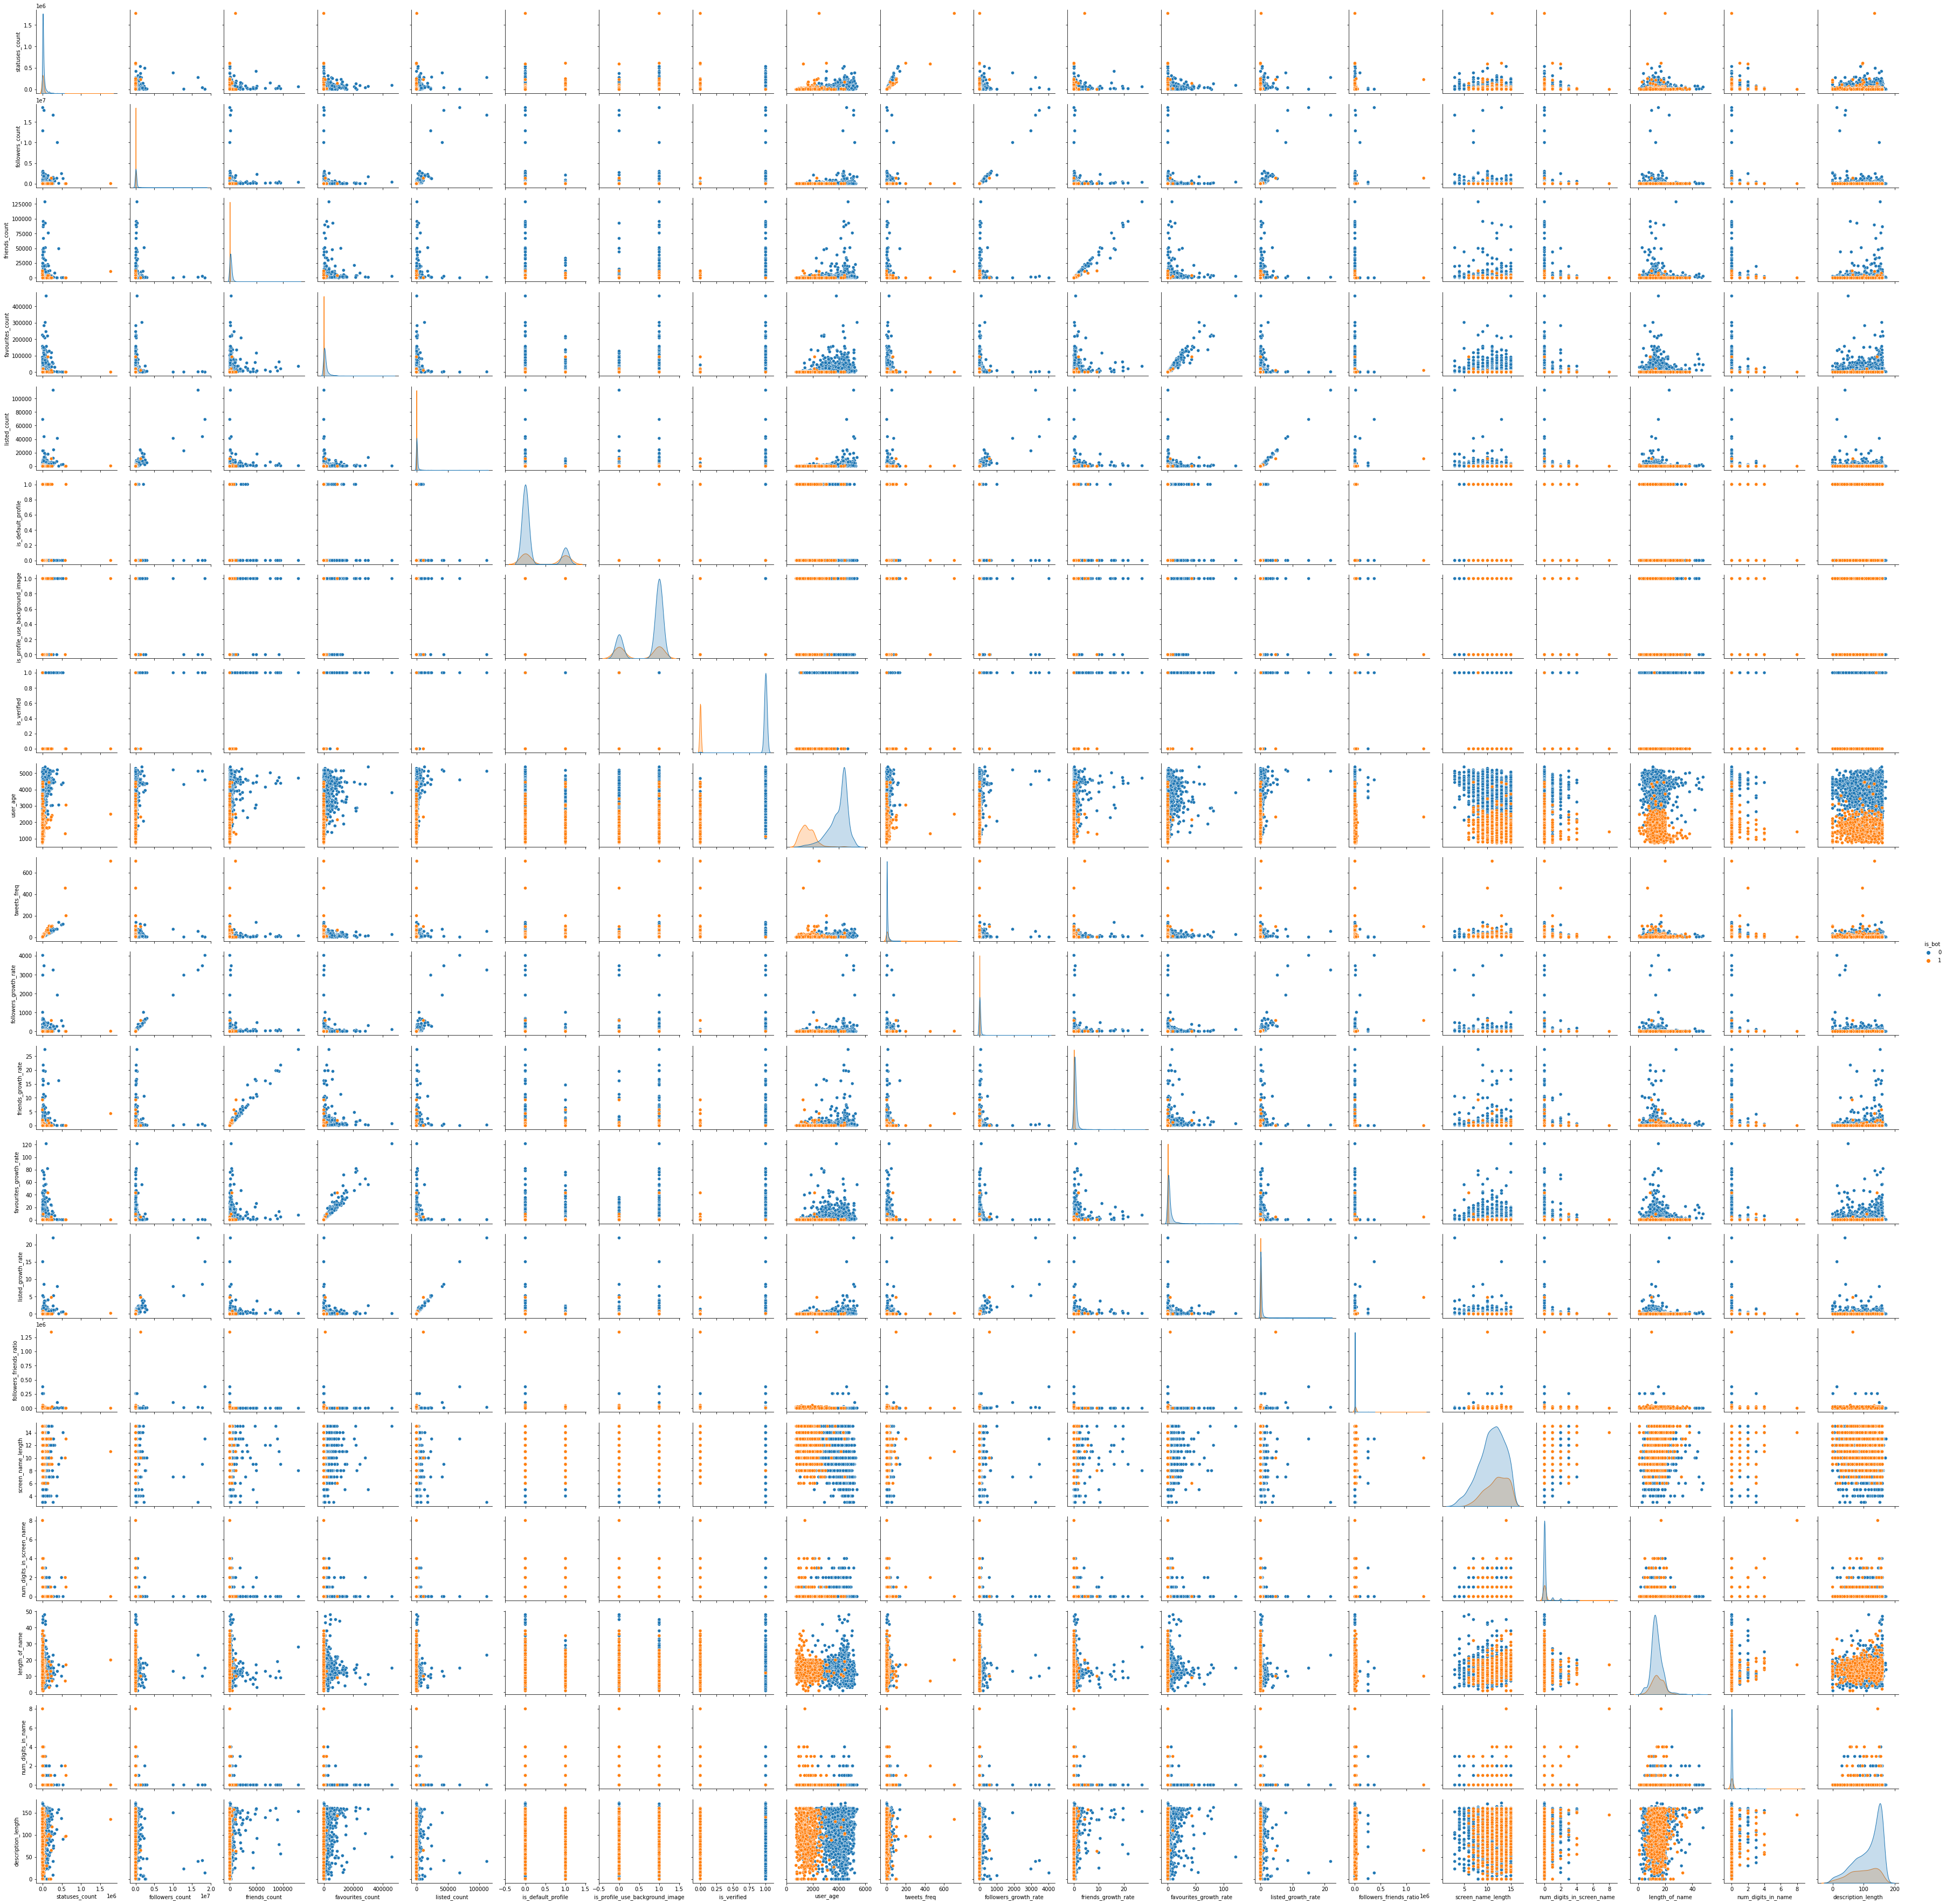

In [8]:
sns.pairplot(df1, hue = 'is_bot')

#### Визуализация heatmap-матрицу кореллированности признаков.

<AxesSubplot:>

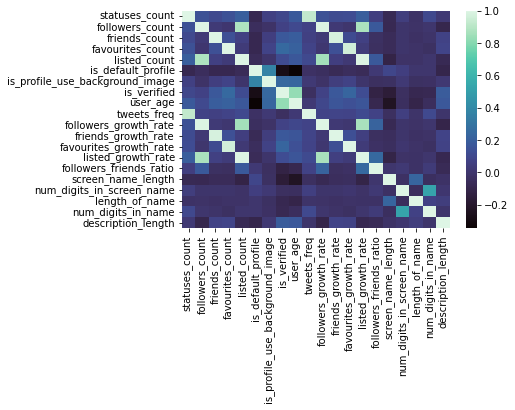

In [9]:
sns.heatmap(df.corr(), cmap = "mako")

#### Деление набора данных на обучающую и тестовую выборки

In [10]:
# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df1.drop('is_bot', axis = 1)
Y = df1.is_bot

In [11]:
# поделили на обучающую и тестовую выборки 1:3
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [12]:
X_train.shape, X_test.shape

((1800, 20), (600, 20))

In [13]:
len(Y_train), len(Y_test)

(1800, 600)

### Отбор наиболее информативных признаков для различных моделей

#### Функция для вывода графика с важностью коэфициентов при соответствующих признаках

In [14]:
def barh_plot(model, X_data):
    attribute = X_data.columns.values
    importance = model.coef_
    list1 = np.vstack([importance, attribute]).T
    list2 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')


#### Линейная регрессия

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model_regress = LinearRegression()
model_regress.fit(X_train, Y_train)
pred_train = model_regress.predict(X_train)
pred_test = model_regress.predict(X_test)

      importance                        attribute
7  -8.955189e-01                      is_verified
13 -9.621046e-02               listed_growth_rate
11 -2.185308e-02              friends_growth_rate
16 -1.262508e-02        num_digits_in_screen_name
6  -6.866026e-03  is_profile_use_background_image
12 -3.157311e-03           favourites_growth_rate
15 -3.771043e-04               screen_name_length
17 -3.357340e-04                   length_of_name
8  -3.042522e-05                         user_age
19 -2.958058e-05               description_length
1  -3.183036e-08                  followers_count
0   3.938367e-08                   statuses_count
14  7.486098e-08          followers_friends_ratio
3   7.710196e-07                 favourites_count
2   5.167443e-06                    friends_count
4   1.958196e-05                     listed_count
18  7.766610e-05               num_digits_in_name
10  1.467319e-04            followers_growth_rate
9   2.275422e-04                      tweets_freq


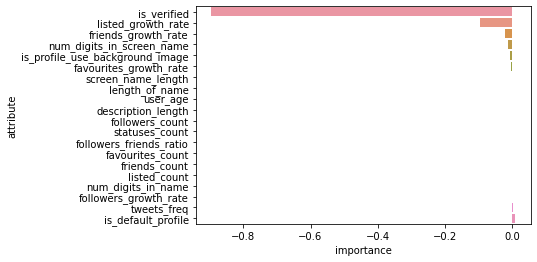

In [17]:
barh_plot(model_regress, X_train)

#### Модель Lasso

In [18]:
from sklearn.linear_model import Lasso

In [19]:
model_lasso = Lasso()
model_lasso.fit(X_train, Y_train)
pred_lasso_train = model_lasso.predict(X_train)
pred_lasso_test = model_lasso.predict(X_test)

      importance                        attribute
8  -2.879077e-04                         user_age
3  -1.558882e-06                 favourites_count
2  -7.663600e-07                    friends_count
1  -3.392450e-08                  followers_count
9  -0.000000e+00                      tweets_freq
17 -0.000000e+00                   length_of_name
16 -0.000000e+00        num_digits_in_screen_name
15 -0.000000e+00               screen_name_length
13 -0.000000e+00               listed_growth_rate
12 -0.000000e+00           favourites_growth_rate
11 -0.000000e+00              friends_growth_rate
19 -0.000000e+00               description_length
18  0.000000e+00               num_digits_in_name
7  -0.000000e+00                      is_verified
6  -0.000000e+00  is_profile_use_background_image
5   0.000000e+00               is_default_profile
10 -0.000000e+00            followers_growth_rate
14  4.433575e-07          followers_friends_ratio
0   6.044801e-07                   statuses_count


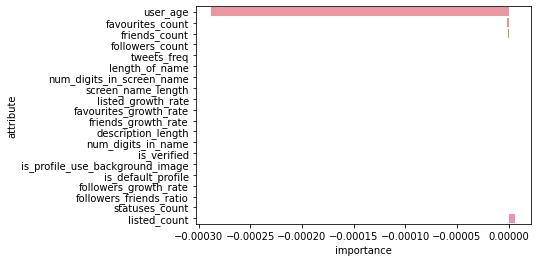

In [20]:
barh_plot(model_lasso, X_train)

#### Модель Ridge

In [21]:
from sklearn.linear_model import Ridge

In [22]:
model_ridge = Ridge(alpha = 0.04)
model_ridge.fit(X_train, Y_train)
pred_ridge_train = model_ridge.predict(X_train)
pred_ridge_test = model_ridge.predict(X_test)

      importance                        attribute
7  -8.951533e-01                      is_verified
13 -9.510712e-02               listed_growth_rate
11 -2.189746e-02              friends_growth_rate
16 -1.262239e-02        num_digits_in_screen_name
6  -6.885744e-03  is_profile_use_background_image
12 -3.176130e-03           favourites_growth_rate
15 -3.788321e-04               screen_name_length
17 -3.356178e-04                   length_of_name
8  -3.053554e-05                         user_age
19 -2.968641e-05               description_length
1  -3.089191e-08                  followers_count
0   3.953364e-08                   statuses_count
14  7.401649e-08          followers_friends_ratio
3   7.755259e-07                 favourites_count
2   5.177567e-06                    friends_count
4   1.934439e-05                     listed_count
18  8.468326e-05               num_digits_in_name
10  1.425902e-04            followers_growth_rate
9   2.276151e-04                      tweets_freq


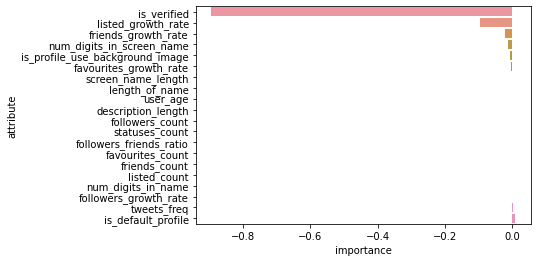

In [23]:
barh_plot(model_ridge, X_train)

#### Модель ElasticNet

In [24]:
from sklearn.linear_model import ElasticNet

In [25]:
model_elastic = ElasticNet()

In [26]:
model_elastic.fit(X_train, Y_train)
pred_train = model_elastic.predict(X_train)
pred_test = model_elastic.predict(X_test)

      importance                        attribute
10 -5.600938e-04            followers_growth_rate
8  -2.876259e-04                         user_age
19 -5.903479e-05               description_length
3  -1.530950e-06                 favourites_count
2  -6.811206e-07                    friends_count
17 -0.000000e+00                   length_of_name
16 -0.000000e+00        num_digits_in_screen_name
15 -0.000000e+00               screen_name_length
13 -0.000000e+00               listed_growth_rate
12 -0.000000e+00           favourites_growth_rate
11 -0.000000e+00              friends_growth_rate
9  -0.000000e+00                      tweets_freq
7  -0.000000e+00                      is_verified
6  -0.000000e+00  is_profile_use_background_image
5   0.000000e+00               is_default_profile
18  0.000000e+00               num_digits_in_name
1   9.651121e-08                  followers_count
14  5.615177e-07          followers_friends_ratio
0   5.984563e-07                   statuses_count


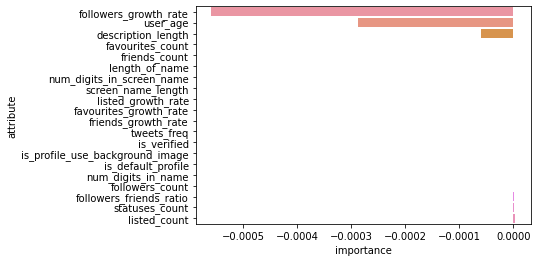

In [27]:
barh_plot(model_elastic, X_train)

#### убираем 10 наименее информативных

In [28]:
df_new = df1.drop('is_verified', axis=1)
df_new = df_new.drop('user_age', axis=1)
df_new = df_new.drop('description_length', axis=1)
df_new = df_new.drop('listed_growth_rate', axis=1)
df_new = df_new.drop('friends_growth_rate', axis=1)
df_new = df_new.drop('num_digits_in_screen_name', axis=1)
df_new = df_new.drop('is_profile_use_background_image', axis=1)
df_new = df_new.drop('favourites_growth_rate', axis=1)
df_new = df_new.drop('screen_name_length', axis=1)
df_new = df_new.drop('length_of_name', axis=1)

df_new.head()

statuses_count  followers_count  friends_count  favourites_count  \
0            5124             6641           3074             13768   
1           10672             8465           1575              4561   
2             704             3108            454              2400   
3            6091           304528            526               599   
4           12967            13693            204              1177   

   listed_count  is_default_profile  tweets_freq  followers_growth_rate  \
0           126                   0     1.890077               2.449650   
1           191                   0     2.412297               1.913427   
2            77                   0     0.518409               2.288660   
3          1515                   0     1.445420              72.265781   
4           452                   0     4.052187               4.279063   

   followers_friends_ratio  num_digits_in_name  is_bot  
0                 2.160377                   0       0  
1                 5.374603                   0       0  
2                 6.845815                   0       0  
3               578.950570                   0       0  
4                67.122549                   0       0

<AxesSubplot:>

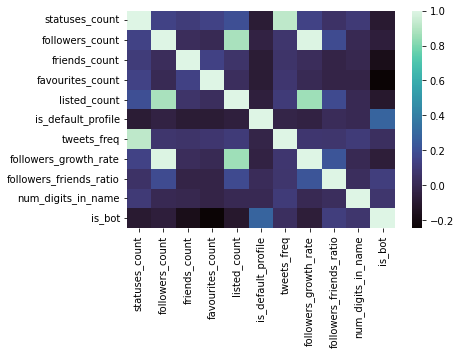

In [29]:
sns.heatmap(df_new.corr(), cmap = "mako")

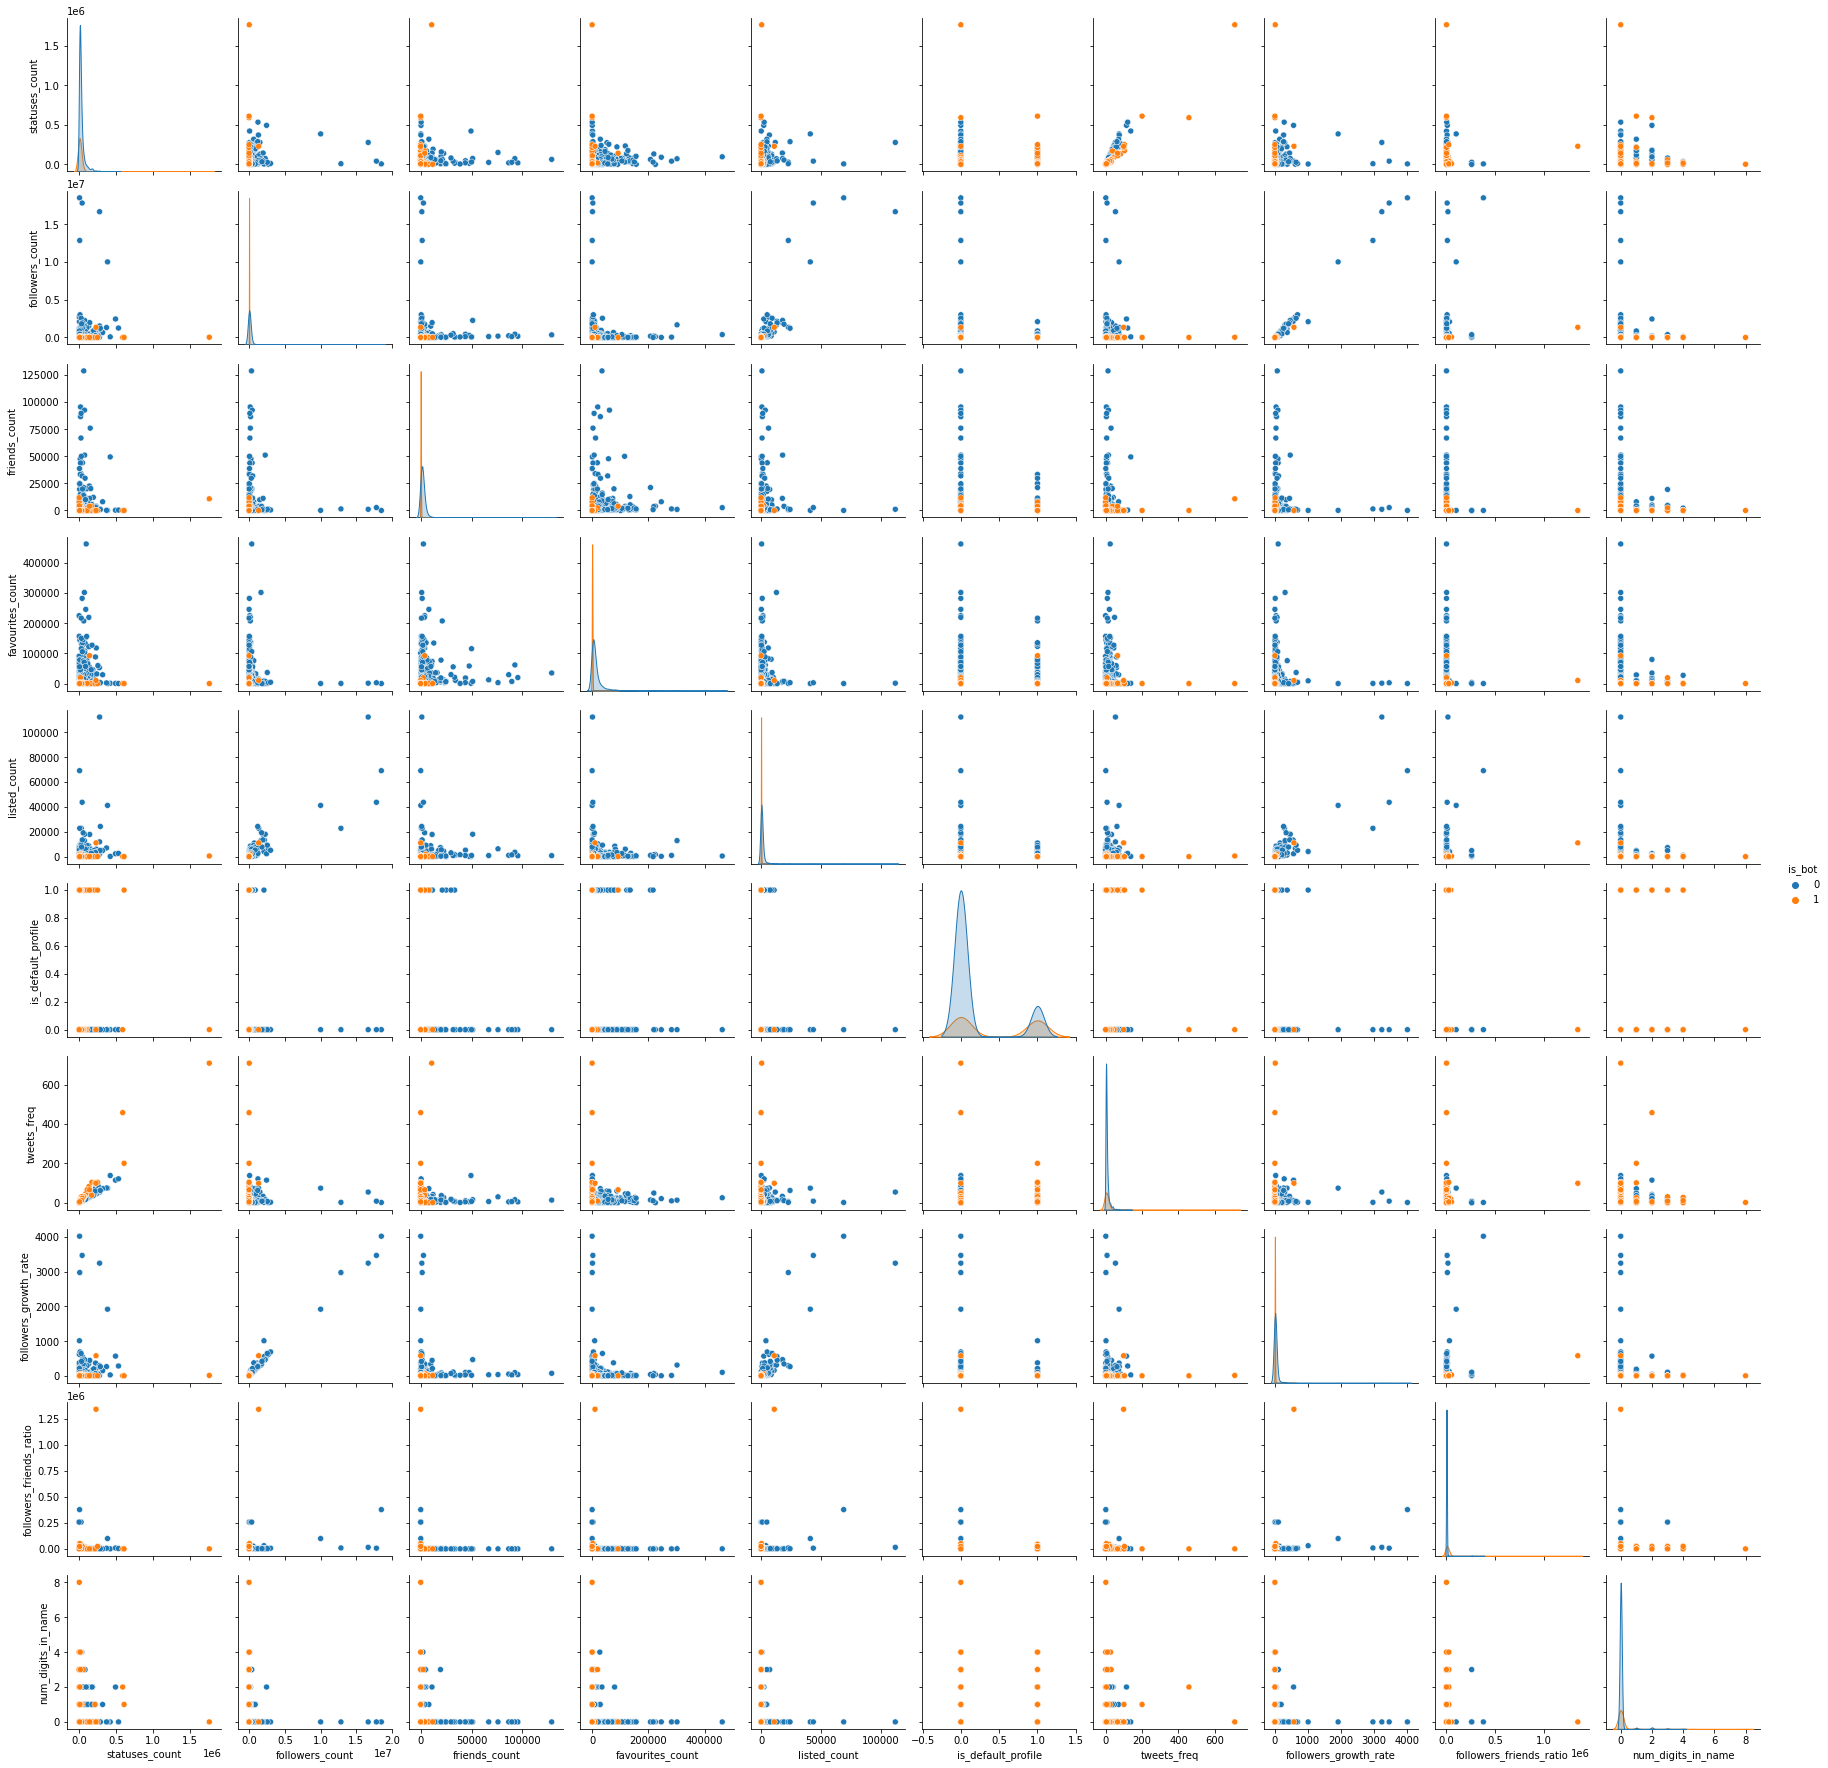

In [30]:
sns.pairplot(df_new, hue = 'is_bot')

### Отбор наиболее информативных признаков при помощи SelectKBest и Extra Tree Classifier

In [31]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
K = 20

In [33]:
# При помощи SelectKBest. DataFrame с признаками и их информативностью, отсортированный по убыванию
best_features1 = SelectKBest(score_func=chi2, k=K)
fit = best_features1.fit(X.values, Y.values)
best_features1 = pd.DataFrame(data=fit.scores_, index = X.columns, columns=['chi2_score'])
best_features1['number'] = pd.Series(range(X.shape[1]), index = best_features1.index)
sel_best = best_features1.nlargest(K, 'chi2_score')
sel_best.head()

chi2_score  number
followers_count          6.568911e+07       1
followers_friends_ratio  9.749806e+06      14
favourites_count         8.109731e+06       3
statuses_count           2.747301e+06       0
friends_count            1.388549e+06       2

In [34]:
# При помощи ExtraTreesClassifier. DataFrame с признаками и их информативностью, отсортированный по убыванию
model2 = ExtraTreesClassifier()
model2 = model2.fit(X.values, Y.values.ravel())
best_features2 = pd.DataFrame(data = model2.feature_importances_, index = X.columns, columns=['feature_importance'])
best_features2['number'] = pd.Series(range(X.shape[1]), index = best_features2.index)
ex_trees = best_features2.nlargest(K, 'feature_importance')
ex_trees.head()

feature_importance  number
is_verified                                0.617960       7
user_age                                   0.200787       8
is_default_profile                         0.028546       5
is_profile_use_background_image            0.022182       6
friends_count                              0.020183       2

In [35]:
# Отбираем лучшие по обоим методам

list_best_number = []
for i in sel_best['number']:
    for j in ex_trees['number']:
        if i == j:
            list_best_number.append(i)

print(len(list_best_number))

20


In [36]:
# оставим 10 лучших
list_bad = list_best_number[10:]
list_bad

[7, 11, 9, 5, 13, 6, 15, 18, 17, 16]

In [37]:
df_best = df1.copy()
df_best = df_best.drop(df_best.columns[list_bad], axis = 1)

In [38]:
df_best.head()

statuses_count  followers_count  friends_count  favourites_count  \
0            5124             6641           3074             13768   
1           10672             8465           1575              4561   
2             704             3108            454              2400   
3            6091           304528            526               599   
4           12967            13693            204              1177   

   listed_count  user_age  followers_growth_rate  favourites_growth_rate  \
0           126      2711               2.449650                5.078569   
1           191      4424               1.913427                1.030967   
2            77      1358               2.288660                1.767305   
3          1515      4214              72.265781                0.142145   
4           452      3200               4.279063                0.367812   

   followers_friends_ratio  description_length  is_bot  
0                 2.160377                  73       0  
1                 5.374603                 142       0  
2                 6.845815                  90       0  
3               578.950570                  51       0  
4                67.122549                 106       0

<AxesSubplot:>

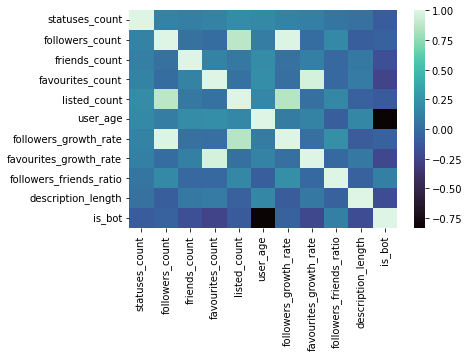

In [39]:
sns.heatmap(df_best.corr(), cmap = "mako")

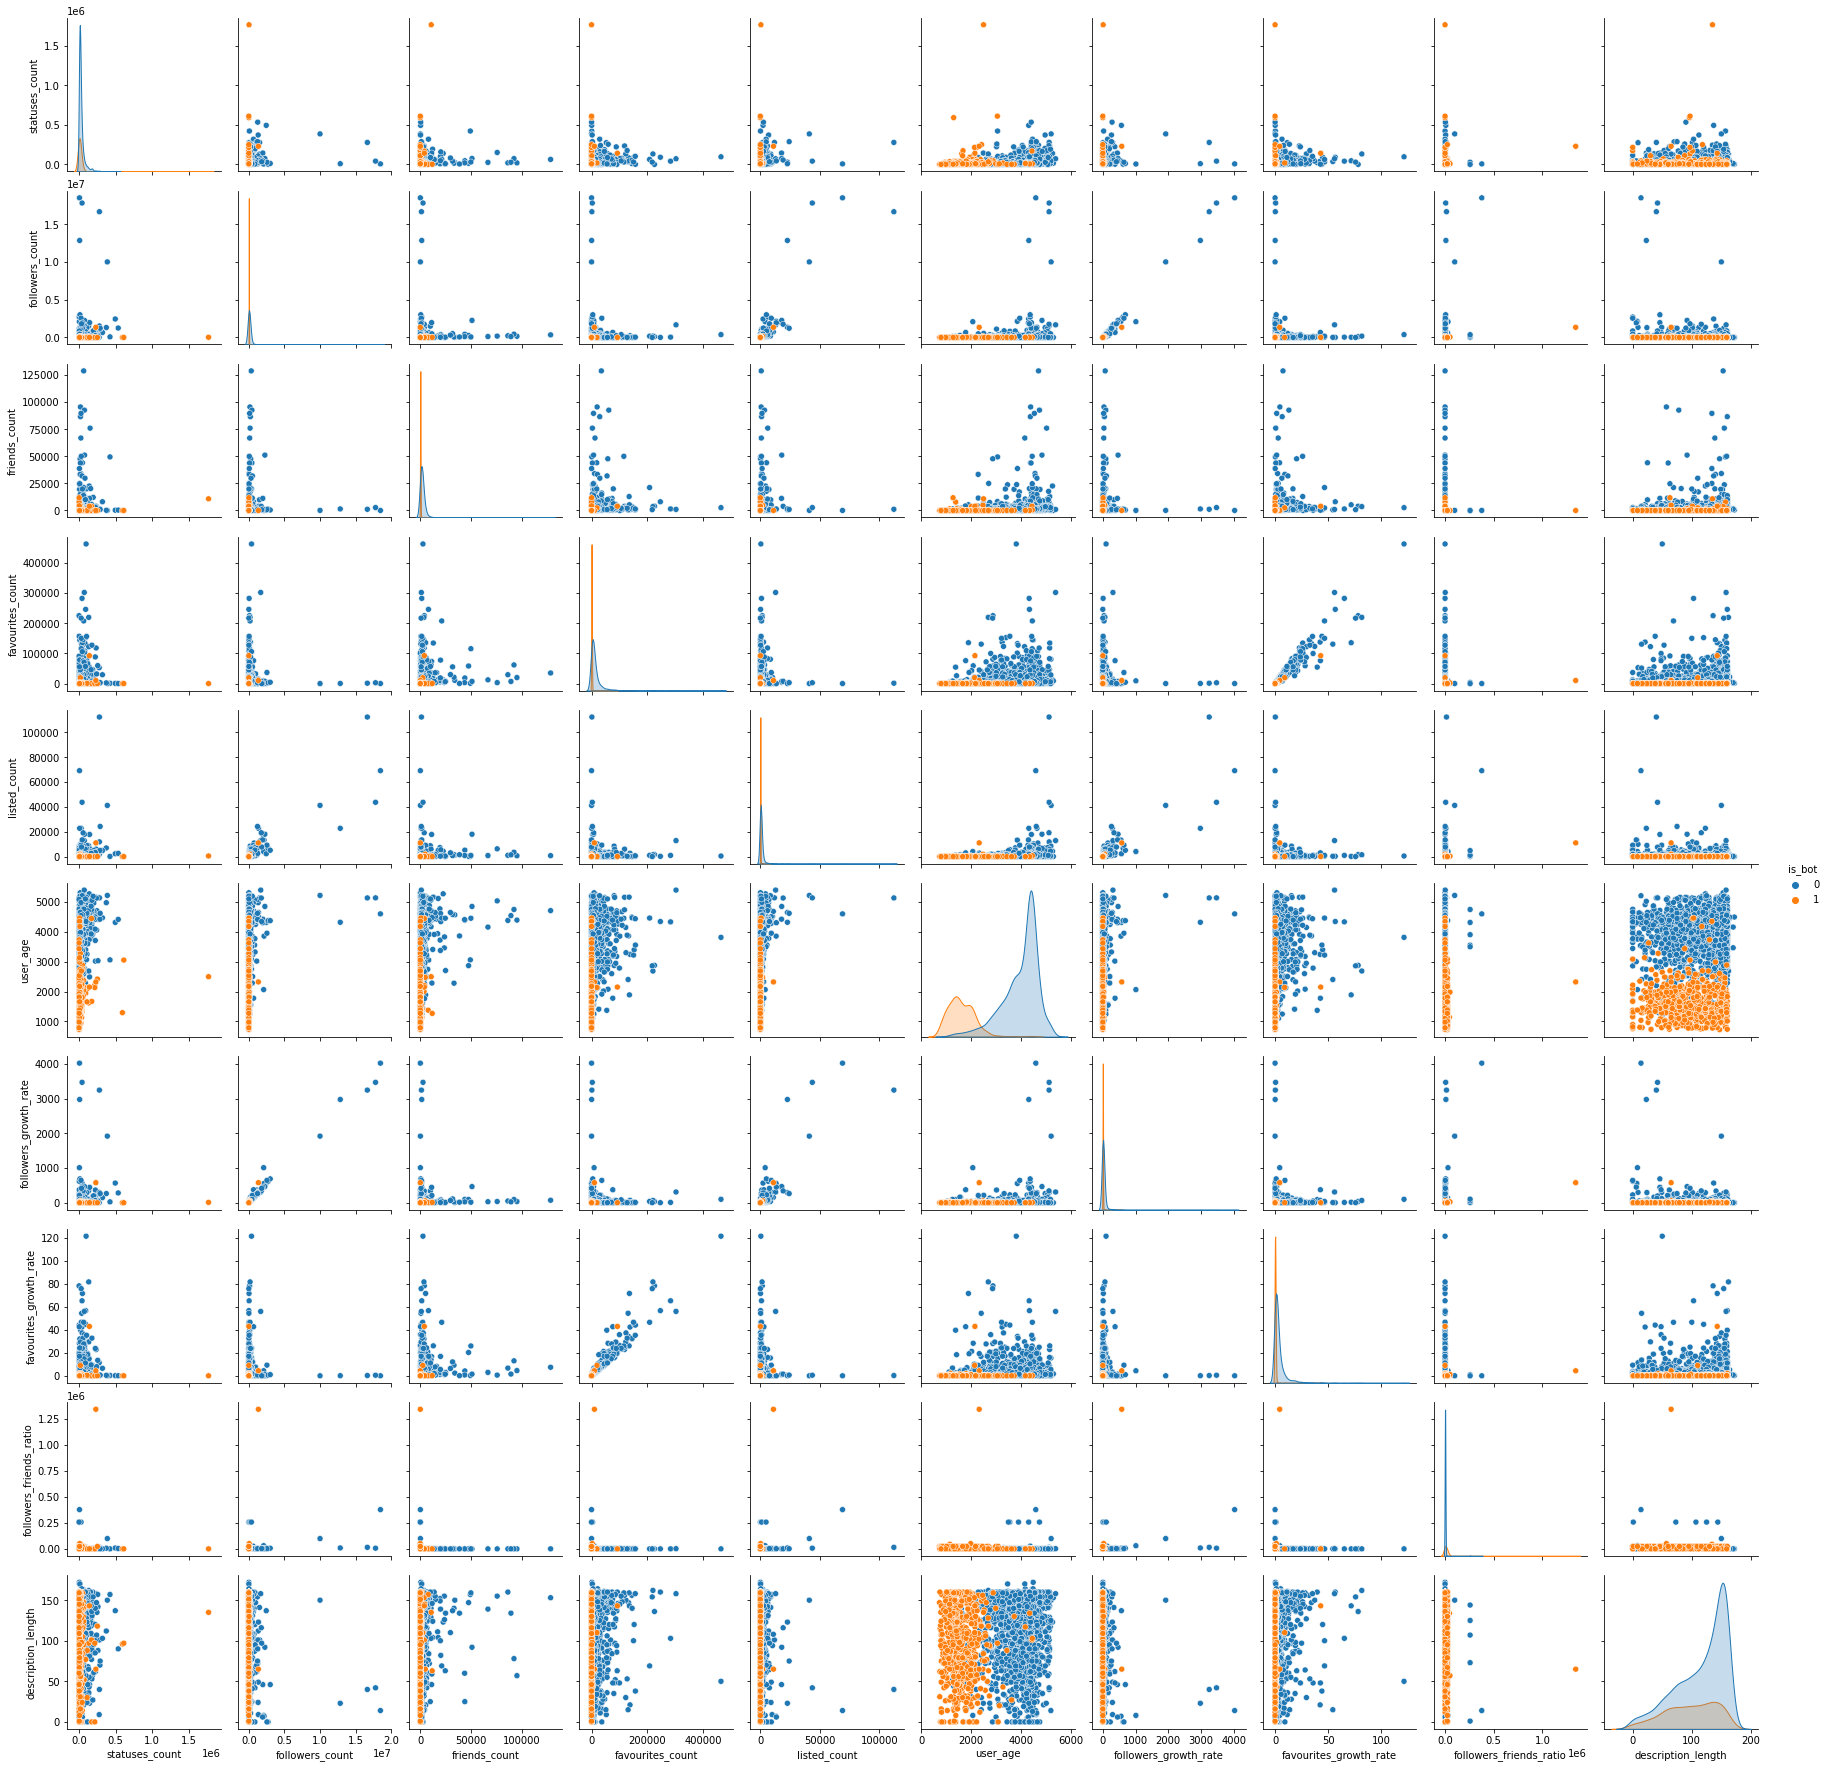

In [40]:
sns.pairplot(df_best, hue = 'is_bot')

### Обучение на "лучших" 10 признаках

#### KNN

In [41]:
X = df_best.drop('is_bot', axis = 1)
Y = df_best.is_bot

Поделили данные на обучающую и тестовую выборки в соотношении 1:3

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

Сначала стандартизируем данные

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
KNN = KNeighborsClassifier()

steps = [('normalizer', scaler), ('KNN', KNN)]
pipe = Pipeline(steps)

С помощью GridSearchCV производим подбор гиперпараметра KNeighborsClassifier (n_neighbors) 

Гиперпараметры для KNeighborsClassifier:
- n_neighbors - это количество соседей, которые нужно использовать, 
- weights - весовая функция,используемая при прогнозировании
- algorithm - алгоритм, используемый для вычисления ближайших соседей

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN = GridSearchCV(pipe, params_KNN)
grid_search_KNN.fit(X_train, Y_train)

grid_search_KNN.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}

обучаем модель с лучшими параметрами

In [48]:
model_KNN = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, weights = 'distance')
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

In [49]:
report_KNN = classification_report(Y_test, Y_KNN)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       447
           1       0.99      0.95      0.97       153

    accuracy                           0.98       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.98      0.98       600



In [63]:
import joblib

In [66]:
# сохраним модель
joblib.dump(model_KNN, 'model_KNN.txt') 

['model_KNN.txt']

#### Логистическая регрессия

In [50]:
from sklearn.linear_model import LogisticRegression

In [59]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

стандартизируем данные

In [60]:
scaler = StandardScaler()
X1_train_M = scaler.fit_transform(X1_train)
X1_test_M = scaler.transform(X1_test)

In [61]:
model_Log = LogisticRegression()
    
model_Log.fit(X1_train_M, Y1_train)
Y_Log = model_Log.predict(X1_test_M)

In [62]:
report_Log = classification_report(Y1_test, Y_Log)
print(report_Log)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       447
           1       0.97      0.97      0.97       153

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [65]:
# сохраним модель
joblib.dump(model_Log, 'model_Log') 

['model_Log']